## Intro

This ex is a full exercise we will write step by step during all the time.

We want to perform data manipulation of Health data take from:
https://apps.who.int/gho/athena/api/GHO".


In particular we want to compare alcohol consumption  
in two different age ranges in multiple countries in different years.




Refs:

15-19 years old total alcohol consumption in litres of pure alcohol

https://www.who.int/data/gho/indicator-metadata-registry/imr-details/465

And: (adult)

"Alcohol, recorded per capita consumption (in litres of pure alcohol)"

https://www.who.int/data/gho/indicator-metadata-registry/imr-details/462

Codes are: 

- SA_0000001760                 (15-19 years)
- SA_0000001400                 (per capita)

Available in "csv" format.

https://apps.who.int/gho/athena/api/GHO/SA_0000001760?format=csv

https://apps.who.int/gho/athena/api/GHO/SA_0000001400?format=csv



## Text:

After downloading files, write a Python program that 
- reads data from "csv" files previously specified, 
- ask user an year, 
- compute the delta in consumption of alcohol from "15-19 years" to "adult" (on all nations that match) where adult use is 30% more than young
- add this column delta to dataframe,
- plot delta for every country, displaying the full name of nation, on x axis

Or "no data" if no data can be computed.



### Notes:

1. we must match years that may differ in the two files.
2. we must map ISO code between files
3. SA_0000001760.csv contains data divided for sex.
4. SA_0000001400.csv contains data divided for alcohol type.
5. even if SA_0000001760.csv contains only one year,<b>(2010)</b> write program that works if it will contain multiple years.
6. we need an auxiliary file to map ISO 3 letters-code to full country name.



Hints:

- use filter to reduce number of lines
- cut columns to reduce memory footprint/computational time 
- use pandas functions  to join datasets (merge)

type an year 2010


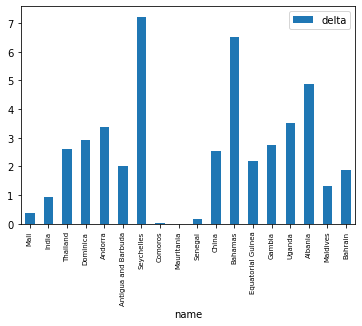

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


YOUNG_15_19_FNAME = "SA_0000001760.csv"
ADULT_FNAME       = "SA_0000001400.csv"
ISO_FNAME         = "countries.csv"


# 15 / 19:

def filterYoungDataOnYearAndSex(df, year):
	filtered = df[ (df['YEAR'] == year) & (df['SEX'] == 'BTSX') ]
	# now we can delete 'SEX' column, and year, too:
	wantedColumns = ['COUNTRY', 'Numeric']
	filtered = filtered[wantedColumns]
	return filtered


def readAndReduceYoungData(year):
	try:
		dataFrame = pd.read_csv(YOUNG_15_19_FNAME)
		# filter columns  needed:
		wantedColumns = ['YEAR', 'COUNTRY', 'SEX','Numeric']
		dataFrame = dataFrame[wantedColumns]
		dataFrame = filterYoungDataOnYearAndSex(dataFrame, year)
		#dataFrame.to_csv("young.csv", index=False)
	except:
		# return empty dataframe:
		dataFrame = pd.DataFrame()

	return dataFrame

#adult:

def filterAdultDataOnYearAndAlcohol(df, year):
	filtered = df[ (df['YEAR'] == year) & (df['ALCOHOLTYPE'] == 'SA_TOTAL') ]
	# now we can delete 'ALCOHOLTYPE' column,, and year, too:
	wantedColumns = ['COUNTRY', 'Numeric']
	filtered = filtered[wantedColumns]

	return filtered



def readAndReduceAdultData(forYear):
	try:
		dataFrame = pd.read_csv(ADULT_FNAME)
		# filter columns  needed:
		wantedColumns = ['YEAR','COUNTRY','ALCOHOLTYPE','Numeric']
		dataFrame = dataFrame[wantedColumns]
		dataFrame = filterAdultDataOnYearAndAlcohol(dataFrame, forYear)
		#dataFrame.to_csv("adult.csv",index=False)
	except:
		# return empty dataframe:
		dataFrame = pd.DataFrame()

	return dataFrame


def mergeAndAddDelta(young_15_19_df, adult_df):
	# as both dataframe have the same "Numeric" value, we change thewm on fly
	# (not needed but more readable: if we don not rename, we will get:
	# COUNTRY,Numeric_x,Numeric_y as columns name

	merged = pd.merge(young_15_19_df, adult_df, on='COUNTRY')
	merged.columns = ['COUNTRY','Numeric_Young','Numeric_Adult'];
	merged = merged[merged['Numeric_Adult'] > 1.3 * merged['Numeric_Young'] ]
	#add columns:
	merged['delta'] = merged['Numeric_Adult'] - merged['Numeric_Young']
	#merged.to_csv("cartesian.csv", index=False)
	return merged


def showDiagram(dataframe):
	dataframe.plot(kind = 'bar', x='name', y= 'delta')
	plt.xticks(fontsize=7)
	plt.show()




def replaceISOCode(df):
	try:
		ISO_dataFrame = pd.read_csv(ISO_FNAME)
		ISO_dataFrame['alpha3'] = ISO_dataFrame['alpha3'].str.upper()

		dataFrame = pd.merge(df, ISO_dataFrame, left_on='COUNTRY', right_on='alpha3')

		# strip un neede columns:
		wantedColumns = ['name', 'delta']
		dataFrame = dataFrame[wantedColumns]
	except:
		# return empty dataframe:
		dataFrame = pd.DataFrame()

	return dataFrame

def askYear():
	ok = False
	while ok == False:
		year = input("type an year ")
		ok = year.isdigit()
		if ok == False:
			print("wrong input")

	return int(year)



#main code:
#year = 2010 #use 2010
year = askYear()

young_15_19_df = readAndReduceYoungData(year)
if young_15_19_df.empty:
	print("no data")
else:
	adult_df = readAndReduceAdultData(year)
	if adult_df.empty:
		print("no data")
	else:
		merged = mergeAndAddDelta(young_15_19_df, adult_df)
		with_ISO = replaceISOCode(merged)
		showDiagram(with_ISO)



# explanation steps for code


During ex5 we will show code n this order:

- read input
- read data for young people
    - filter data / columns
- read data for adult people
    - filter data / columns
- merge data
    - filter columns
    - add delta columns
    - filter on condition on 130%
- replace ISO code
- plot data


In every step we will point out error treatment (files only ) and pandas operator/funcions.
